[Text(0.5, 1.0, 'Measured current splitter outputs'),
 Text(0.5, 0, 'time (s)'),
 Text(0, 0.5, 'I_out (uA)')]

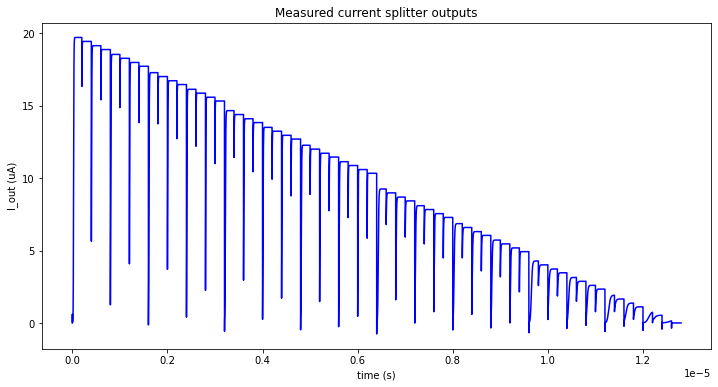

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_400_20 = pd.read_csv("output_at_400ns_clock_20u_bias.csv").to_numpy(dtype=np.float32)
df_200_50 = pd.read_csv("output_at_200ns_clock_50u_bias.csv").to_numpy(dtype=np.float32)
df_200_20 = pd.read_csv("output_at_200ns_clock_20u_bias.csv").to_numpy(dtype=np.float32)
df_200_10 = pd.read_csv("output_at_200ns_clock_10u_bias.csv").to_numpy(dtype=np.float32)
# df_200_50 = pd.read_csv("output_at_200ns_switch_rate.csv").to_numpy(dtype=np.float32)
df_100_50 = pd.read_csv("output_at_100ns_switch_rate.csv").to_numpy(dtype=np.float32)
df_50_50 = pd.read_csv("output_at_50ns_switch_rate.csv").to_numpy(dtype=np.float32)

### ### ### Change these for different analyses ### ### ###
df = df_400_20
I_0 = 20e-6  # Input current
switch_period = 400e-9 / 2  # Full period is 400ns switch on/off each once, i.e. a switch every 200ns
### ### ### ### ### ### ### ### ### ### ### ### ### ### ###

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df[:,0], df[:,1] * 1e6, 'b')
ax.set(
    title="Measured current splitter outputs",
    xlabel="time (s)",
    ylabel=f"I_out (uA)"
)

In [28]:
n_bits = 6  # Number of input bits
ideal_LSB_step = I_0 / (2 ** n_bits)  # Current difference between two bits 

In [29]:
experiment_length = switch_period * (2 ** n_bits)  # 12.80ms experiment
sample_period = experiment_length / switch_period
interval = df.shape[0]/(sample_period)
steps = np.arange(start=interval*.8, stop=df.shape[0], step=interval).astype(int)

In [30]:
x = np.arange(0, int(sample_period))
ideal_outputs = (1 - (x+1)/(2**n_bits)) * I_0
t = steps*experiment_length/df.shape[0]


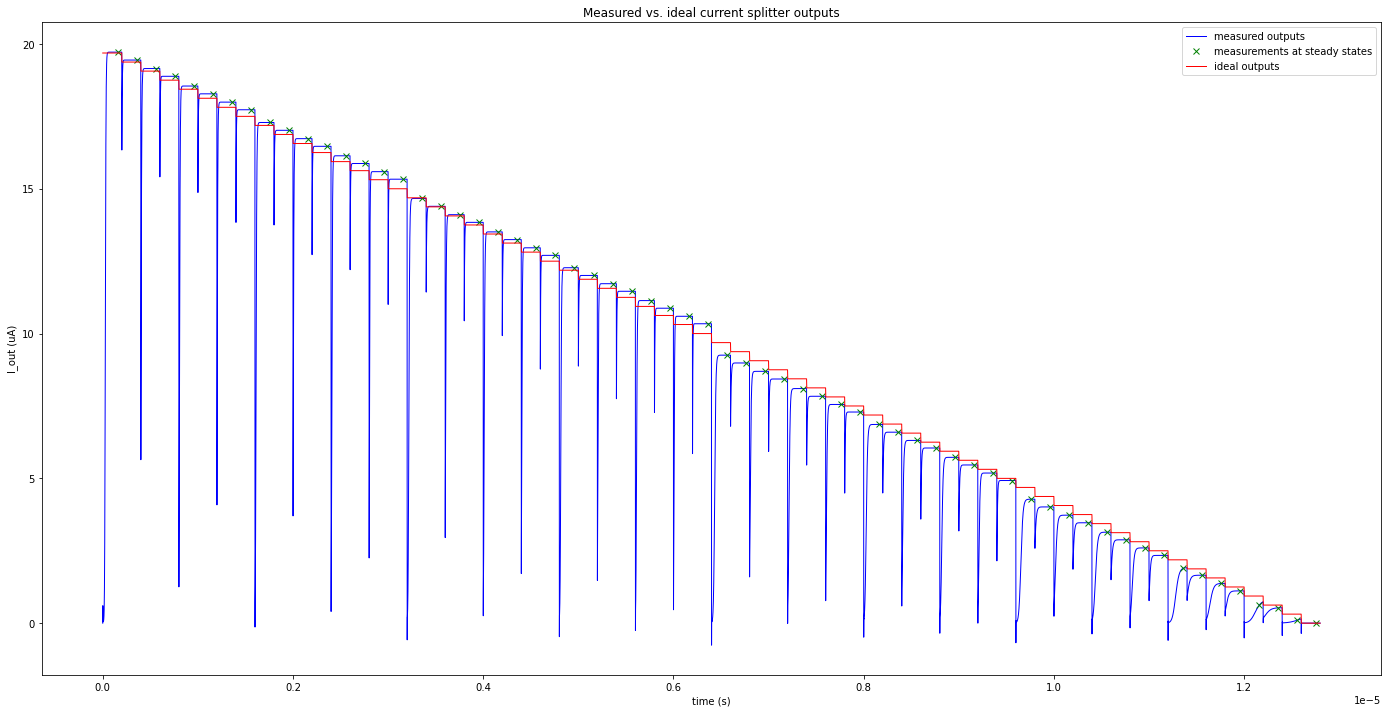

In [31]:
fig, ax = plt.subplots(figsize=(24,12))
ax.plot(df[:,0], df[:,1] * 1e6, 'b', linewidth=1, label="measured outputs")
ax.plot(df[steps,0], df[steps,1] * 1e6, 'gx', label="measurements at steady states")
ax.plot(df[:,0], ideal_outputs[(np.arange(df.shape[0])/interval).astype(int)] * 1e6, 'r', linewidth=1, label="ideal outputs")
ax.set(
    title="Measured vs. ideal current splitter outputs",
    xlabel="time (s)",
    ylabel=f"I_out (uA)"
)
ax.legend()

[Text(0.5, 1.0, 'Differential Nonlinearity (DNL) of current splitter-based DAC'),
 Text(0.5, 0, 'time (s)'),
 Text(0, 0.5, 'DNL Deviation in multiples of LSB = 312nA')]

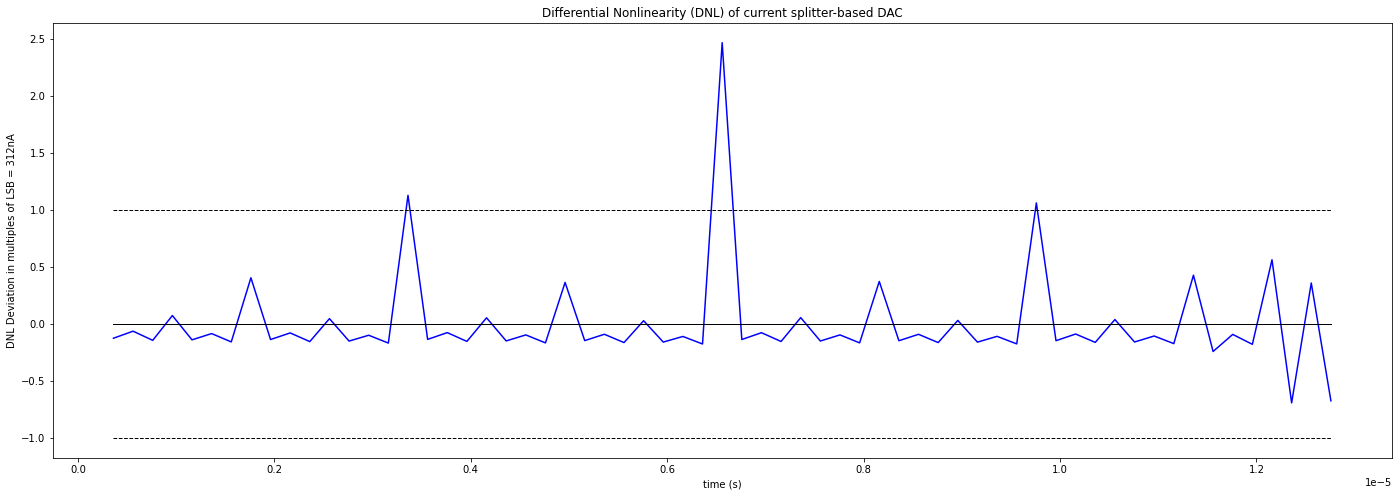

In [32]:
DNL = (df[steps[1:],1] - df[steps[:-1],1]) / (-ideal_LSB_step) - 1
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(t[1:], DNL, 'b')
ax.plot(t[1:], np.ones_like(DNL), 'k--', linewidth=1)
ax.plot(t[1:], -np.ones_like(DNL), 'k--', linewidth=1)
ax.plot(t[1:], np.zeros_like(DNL), 'k-', linewidth=1)
ax.set(
    title="Differential Nonlinearity (DNL) of current splitter-based DAC",
    xlabel="time (s)",
    ylabel=f"DNL Deviation in multiples of LSB = {round(ideal_LSB_step*1e9)}nA"
)


[Text(0.5, 1.0, 'Integral Nonlinearity (INL) of current splitter-based DAC'),
 Text(0.5, 0, 'time (s)'),
 Text(0, 0.5, 'INL Deviation in multiples of LSB = 312nA')]

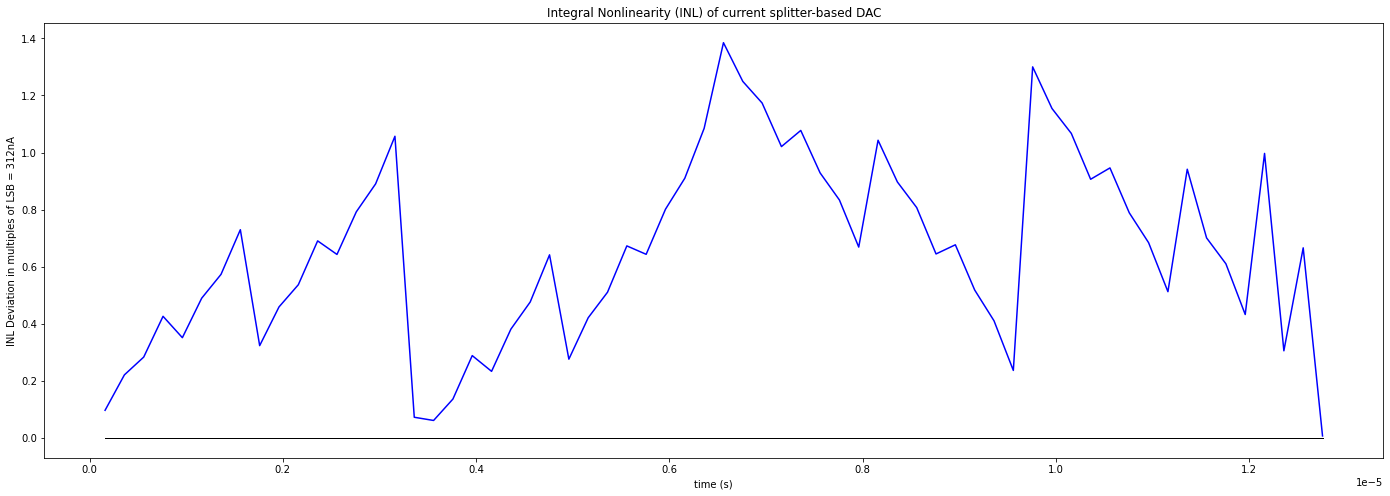

In [33]:
N_c = 2 ** n_bits
INL = np.abs(ideal_outputs - df[steps,1])
INL_max = np.max(INL)
INL_max_norm = INL_max / ideal_LSB_step

fig, ax = plt.subplots(figsize=(24,8))
ax.plot(t, INL/ideal_LSB_step, 'b')
ax.plot(t, np.zeros_like(INL), 'k-', linewidth=1)
ax.set(
    title="Integral Nonlinearity (INL) of current splitter-based DAC",
    xlabel="time (s)",
    ylabel=f"INL Deviation in multiples of LSB = {round(ideal_LSB_step*1e9)}nA"
)